# Clustering Using Scikit-Learn Library
## Part 1 : kMeans Clustering



### Description of the dataset
The dataset we will use contains preprocessed/clean data about **440 clients** of a wholesale distributor, mainly about the products that clients buy during one year. Below is a brief description of the **8 attributes** in this dataset:

- FRESH: annual spending on fresh products
- MILK: annual spending on milk products
- GROCERY: annual spending on grocery products
- FROZEN: annual spending on frozen products
- DETERGENTS_PAPER: annual spending on detergents and paper products
- DELICATESSEN: annual spending on delicatessen products
- TYPE: type of customer - Hotel/Restaurant/Cafe (1) or wholesale depot (2)
- REGION: region where customer lives - Tunis (1), Sfax (2) or Other (3)

We will use this dataset to extract clustering patterns, i.e. determine whether these customers can be divided into a small number of groups.

Source: http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [1]:
# import Python libraries we will need later

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# allow plots to appear inside the notebook
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

In [3]:
# import some modules from the scikit-learn library

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

***

## Get the data

In [4]:
df0 = pd.read_csv('Wholesale customers data.csv')

In [5]:
print(type(df0))
print(df0.shape)

<class 'pandas.core.frame.DataFrame'>
(440, 8)


In [6]:
df0.head()

,Type,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df0.dtypes

Type                int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [8]:
df0.describe()

,Type,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df0.Type.value_counts()

1    298
2    142
Name: Type, dtype: int64

In [10]:
df0.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

*******

## Data Preparation

In [38]:
?MinMaxScaler

In [32]:
# Create a copy of original data frame
df_hot = df0

###  a) One hot encoding

In [33]:
#  Convert the 'Type' attribute to binary using the get_dummies() method
dummies = pd.get_dummies(df_hot['Type'], prefix='Type')  #create 2 binary attributes based on Type attrubute
df_hot = pd.concat([df_hot, dummies], axis=1)    #add these attrubutes to data frame
df_hot.drop('Type', axis=1, inplace=True)  # remove the categorical attribute from data frame
df_hot.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Type_2
0,3,12669,9656,7561,214,2674,1338,0,1
1,3,7057,9810,9568,1762,3293,1776,0,1
2,3,6353,8808,7684,2405,3516,7844,0,1
3,3,13265,1196,4221,6404,507,1788,1,0
4,3,22615,5410,7198,3915,1777,5185,0,1


In [34]:
# Remove the Type_2 attribute because it is redundant
df_hot.drop('Type_2', axis=1, inplace=True)
df_hot.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1
0,3,12669,9656,7561,214,2674,1338,0
1,3,7057,9810,9568,1762,3293,1776,0
2,3,6353,8808,7684,2405,3516,7844,0
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,0


In [35]:
# Do the same thing for the other categorical attributes
# WRITE YOUR CODE BELOW
dummies = pd.get_dummies(df_hot['Region'], prefix='Region')  #create 2 binary attributes based on Type attrubute
df_hot = pd.concat([df_hot, dummies], axis=1)    #add these attrubutes to data frame
df_hot.drop('Region', axis=1, inplace=True)  # remove the categorical attribute from data frame
df_hot.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,0,0,1
1,7057,9810,9568,1762,3293,1776,0,0,0,1
2,6353,8808,7684,2405,3516,7844,0,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,1
4,22615,5410,7198,3915,1777,5185,0,0,0,1


In [36]:
df_hot.drop('Region_3', axis=1, inplace=True)
df_hot.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2
0,12669,9656,7561,214,2674,1338,0,0,0
1,7057,9810,9568,1762,3293,1776,0,0,0
2,6353,8808,7684,2405,3516,7844,0,0,0
3,13265,1196,4221,6404,507,1788,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,0


In [37]:
# verify the shape of the new data frame
df_hot.shape

(440, 9)

### b) Scale normalization
In order to give equal importance to all our attributes, we are going to transform all attributes to the range [0,1].
We will do this using the``MinMaxScaler`` class.

**Reference**: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [61]:
# WRITE YOUR CODE BELOW (try to follow the comments)

# create an instance of MinMaxScaler class
scaler = MinMaxScaler()

# call the fit() method
scaler.fit(df_hot)

# call the transform() method
scaler = scaler.transform(df_hot)

# put the result in a data frame called df_transformed
df_transformed = pd.DataFrame(scaler)

print(df_transformed)

            0         1         2         3         4         5    6    7    8
0    0.112940  0.130727  0.081464  0.003106  0.065427  0.027847  0.0  0.0  0.0
1    0.062899  0.132824  0.103097  0.028548  0.080590  0.036984  0.0  0.0  0.0
2    0.056622  0.119181  0.082790  0.039116  0.086052  0.163559  0.0  0.0  0.0
3    0.118254  0.015536  0.045464  0.104842  0.012346  0.037234  1.0  0.0  0.0
4    0.201626  0.072914  0.077552  0.063934  0.043455  0.108093  0.0  0.0  0.0
5    0.083907  0.111706  0.055218  0.010535  0.043896  0.030204  0.0  0.0  0.0
6    0.108098  0.042809  0.075148  0.007478  0.076842  0.011306  0.0  0.0  0.0
7    0.067554  0.066732  0.101566  0.027020  0.081276  0.053463  0.0  0.0  0.0
8    0.053144  0.048922  0.066708  0.006574  0.041961  0.015582  1.0  0.0  0.0
9    0.053527  0.150293  0.203477  0.018638  0.181805  0.043700  0.0  0.0  0.0
10   0.029987  0.072818  0.139808  0.071905  0.146335  0.036316  0.0  0.0  0.0
11   0.117193  0.014556  0.048719  0.022927  0.01337

In [62]:
# Check the size of the new data frame
df_transformed.shape

(440, 9)

In [63]:
# Check the first few lines in the new data frame
df_transformed.head()

,0,1,2,3,4,5,6,7,8
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,0.0,0.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,0.0,0.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,0.0,0.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,0.0,0.0


In [64]:
# Check the distribution of values (make sure they are between 0 and 1)
df_transformed.describe()

,0,1,2,3,4,5,6,7,8
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745,0.677273,0.1750,0.106818
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826,0.468052,0.3804,0.309234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453,0.000000,0.0000,0.000000
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077,1.000000,0.0000,0.000000
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907,1.000000,0.0000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


******

## kMeans Clustering Method

**References: **
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [79]:
# Read documentation of KMeans class constructor
?KMeans

In [72]:
# Run kMeans with 3 clusters
K = 3
km = KMeans(n_clusters=K, random_state=10)   # create instance of KMeans class
km.fit(df_transformed)  # run kMeans algorithm with 3 clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [73]:
# Determine the value of SSD (Sum of Squared Distances)
km.inertia_

75.07473014024927

In [82]:
# How many objects are there in each cluster?
# Hint: use km.labels_ (member variable of KMeans class)
# WRITE YOUR CODE BELOW
pd.Series(km.labels_).value_counts()

0    239
1    124
2     77
dtype: int64

In [83]:
# Run kMeans algorithm with different values of K: K=1,...,15  and store the value of SSD for each K in a list
# COMPLETE THE CODE BELOW

K_values = range(1,16)
Sum_of_squared_distances = []   # initialize empty list to store SSD values
for k in K_values:
    km = KMeans(n_clusters=k, random_state=10)   # create instance of KMeans class
    km.fit(df_transformed)
    x = km.inertia_
    Sum_of_squared_distances.append(x)

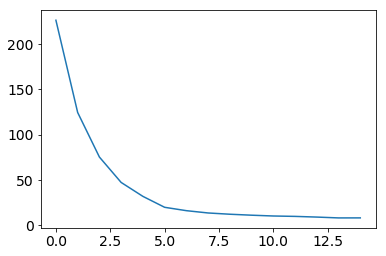

In [84]:
# Plot Sum_of_squared_distances vs. K_values
# Hint: use the function plt.plot() ...
# WRITE YOUR CODE BELOW
plt.plot(Sum_of_squared_distances)

In [85]:
# Re-run kMeans with the best value of K
# WRITE YOUR CODE BELOW
K = 5
km = KMeans(n_clusters=K, random_state=10)   # create instance of KMeans class
km.fit(df_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [86]:
km.inertia_

31.52287127609206

In [90]:
# Calculate the silhouette coefficient by calling the function silhouette_score() imported at the beginning of this file
# Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# WRITE YOUR CODE BELOW
scores = silhouette_score(df_transformed, km.labels_)
print(scores)

0.7491712768585141


****